**1)**
Let's simulate 2 signal distributions, plot them, and compute d' and the probabilities of the four outcomes with a specific criterion

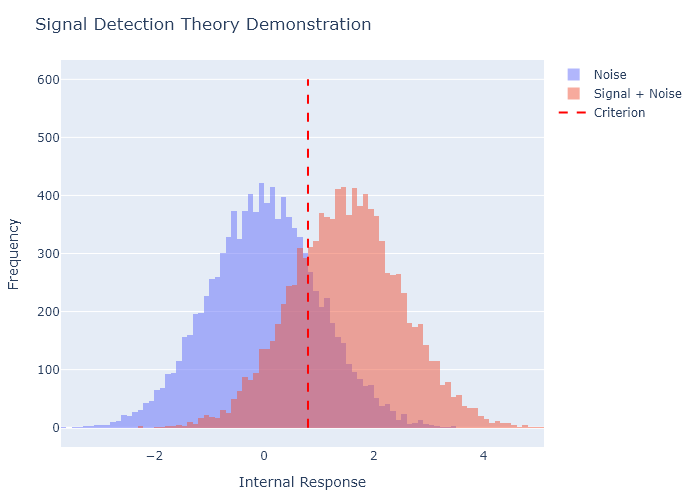

d': 1.5
Criterion: 0.8
Hits: 381 (76.51%)
Misses: 117 (23.49%)
False Alarms: 105 (20.92%)
Correct Rejections: 397 (79.08%)


In [ ]:
using Distributions
using PlotlyJS

# --- Signal Detection Theory Simulation ---

# 1. Parameters
dPrime = 1.5  # Sensitivity (d')
criterion = 0.8  # Response criterion

# 2. Distributions
dist_noise = Normal(0, 1)  # Noise distribution
dist_signal = Normal(dPrime, 1)  # Signal + noise distribution

# 3. Generate trials
nTrials = 1000
signalPresent = rand(Bernoulli(0.5), nTrials)  # 50% signal presence
stimuli = signalPresent .* rand(dist_signal, nTrials) + (1 .- signalPresent) .* rand(dist_noise, nTrials)

# 4. Apply criterion
responses = stimuli .>= criterion  
# 5. Calculate outcomes
hits = sum(responses .& (signalPresent .== 1))
misses = sum((.!responses) .& (signalPresent .== 1))
falseAlarms = sum(responses .& (signalPresent .== 0))
correctRejections = sum((.!responses) .& (signalPresent .== 0))

# --- Visualization with PlotlyJS ---

# Generate data for histograms
noise_data = rand(dist_noise, 10000)
signal_data = rand(dist_signal, 10000)
y = max
# Create the histogram traces
noise_trace = PlotlyJS.histogram(x=noise_data, name="Noise", opacity=0.5)
signal_trace = PlotlyJS.histogram(x=signal_data, name="Signal + Noise", opacity=0.5)

# Create the criterion line trace
criterion_trace = PlotlyJS.scatter(
    x=[criterion, criterion], y=[0, 600],
    mode="lines",
    name="Criterion",
    line=attr(color="red", dash="dash")
)

# Create the plot
plt = PlotlyJS.plot(
    [noise_trace, signal_trace, criterion_trace],
    Layout(
        xaxis_title="Internal Response",
        yaxis_title="Frequency",
        title="Signal Detection Theory Demonstration",
        barmode="overlay"
    )
)

# Display the plot
display(plt)

# Display results
println("d': ", dPrime)
println("Criterion: ", criterion)
println("Hits: ", hits, " (", round(hits / sum(signalPresent) * 100, digits=2), "%)")
println("Misses: ", misses, " (", round(misses / sum(signalPresent) * 100, digits=2), "%)")
println("False Alarms: ", falseAlarms, " (", round(falseAlarms / sum(.!signalPresent) * 100, digits=2), "%)")
println("Correct Rejections: ", correctRejections, " (", round(correctRejections / sum(.!signalPresent) * 100, digits=2), "%)")

**2)**
Let's create a series of pairs of distributions with different d's and plot their ROC cruves.

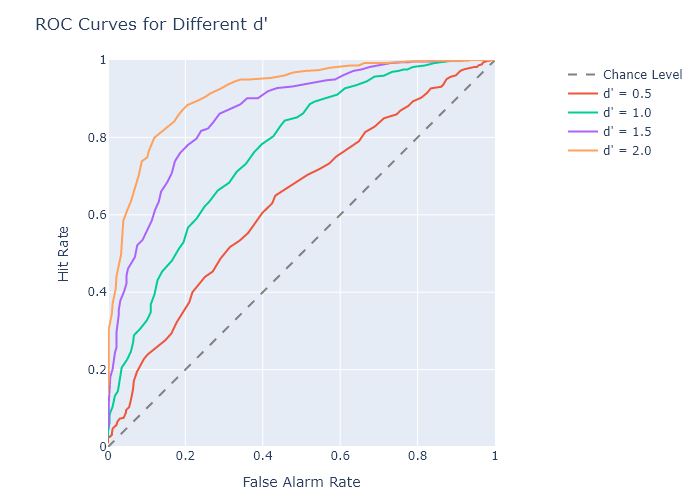

In [ ]:
using Distributions
using PlotlyJS

# --- Signal Detection Theory Simulation (Multiple d') ---

# 1. Parameters
dPrimes = [0.5, 1.0, 1.5, 2.0]  # Range of sensitivities
criteria = range(-3, 3, length=100)  # Range of criteria for ROC

# 2. Distributions
dist_noise = Normal(0, 1)  # Noise distribution

# --- ROC Analysis and Visualization ---

plt = PlotlyJS.plot(Layout(
    xaxis_title="False Alarm Rate",
    yaxis_title="Hit Rate",
    title="ROC Curves for Different d'",
    xaxis_range=[0, 1],
    yaxis_range=[0, 1],
    xaxis_constrain="domain",  # Ensure the x-axis stays within the plot area
    yaxis=attr(scaleanchor="x",  # Link y-axis scaling to x-axis
                 scaleratio=1),    # Maintain 1:1 aspect ratio
 ))

# Add diagonal reference line
PlotlyJS.add_trace!(plt, PlotlyJS.scatter(x=[0, 1], y=[0, 1], mode="lines", line=attr(color="gray", dash="dash"), name="Chance Level"))

for dPrime in dPrimes
    dist_signal = Normal(dPrime, 1)  # Signal + noise distribution

    # 3. Generate trials (for each d')
    nTrials = 1000
    signalPresent = rand(Bernoulli(0.5), nTrials)
    stimuli = signalPresent .* rand(dist_signal, nTrials) + (1 .- signalPresent) .* rand(dist_noise, nTrials)

    # 4. ROC Calculation
    hitRates = zeros(length(criteria))
    falseAlarmRates = zeros(length(criteria))

    for (i, criterion) in enumerate(criteria)
        responses = stimuli .>= criterion
        hits = sum(responses .& (signalPresent .== 1))
        falseAlarms = sum(responses .& (signalPresent .== 0))

        hitRates[i] = hits / sum(signalPresent)
        falseAlarmRates[i] = falseAlarms / sum(.!signalPresent)
    end

    # 5. Add ROC Curve to Plot
    PlotlyJS.add_trace!(plt, PlotlyJS.scatter(x=falseAlarmRates, y=hitRates, mode="lines", name="d' = $dPrime"))
end

# Display the plot
display(plt)